In [59]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_squared_log_error
#Plotting and Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [60]:
from pmdarima import auto_arima

In [61]:
df=pd.read_excel("FinalDF.xlsx")
df=df.drop('Unnamed: 0',axis=1)
df
df.index = df['Date']


In [62]:
model_train=df.iloc[:int(df.shape[0]*0.80)]
valid=df.iloc[int(df.shape[0]*0.80):]
y_pred=valid.copy()

In [63]:
model_scores_r2=[]
model_scores_mse=[]
model_scores_rmse=[]
model_scores_mae=[]
model_scores_rmsle=[]
model_arima= auto_arima(model_train["Adj Close"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
              suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Adj Close"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1927.557, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1926.052, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1928.044, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1928.790, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1926.149, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1928.048, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1929.460, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1930.489, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1927.921, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1928.988, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1930.650, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1930.261, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1928.552, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1930.485, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1930.167, Time=0.29 sec

Best mode

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [64]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [65]:
y_pred

,Date,Summary,Negative,Positive,Neutral,Comp,Open,High,Low,Close,Adj Close,Volume,ARIMA Model Prediction
Date,,,,,,,,,,,,,
2021-10-29,2021-10-29,"Sensex, Nifty Fall For Third Day In A Row Drag...",0.071000,0.095000,0.835000,0.771700,2596.149902,2596.149902,2501.699951,2536.250000,2536.250000,6568539,2598.698624
2021-11-01,2021-11-01,Stock Price Range for TD 02-Nov-2021 RELIANCE\...,0.028000,0.107000,0.865000,0.883900,2536.250000,2556.000000,2494.100098,2537.800049,2537.800049,7144532,2602.347591
2021-11-02,2021-11-02,Stock market plunging as South Africa hails de...,0.044000,0.176000,0.780000,0.989900,2545.000000,2548.000000,2495.250000,2500.800049,2500.800049,4877652,2605.996559
2021-11-03,2021-11-03,All that fear created from outside noise for y...,0.122000,0.104000,0.773000,-0.676400,2506.050049,2520.000000,2461.000000,2483.600098,2483.600098,5533120,2609.645526
2021-11-04,2021-11-04,My MuhuratTrading additions today for long ter...,0.000000,0.088000,0.912000,0.439100,2492.949951,2504.899902,2490.000000,2498.850098,2498.850098,787160,2613.294494
2021-11-08,2021-11-08,"MUMBAI: Reliance Eagleford Upstream Holding, L...",0.054000,0.163000,0.783000,0.992200,2519.399902,2520.000000,2456.399902,2501.949951,2501.949951,9385607,2616.943461
2021-11-09,2021-11-09,Stock Price Range for TD 10-Nov-2021 RELIANCE\...,0.065000,0.087000,0.848000,0.835600,2505.000000,2528.899902,2487.050049,2521.699951,2521.699951,7237470,2620.592429
2021-11-10,2021-11-10,Stock Price Range for TD 11-Nov-2021 RELIANCE\...,0.135000,0.026000,0.839000,-0.851900,2516.699951,2558.000000,2503.649902,2549.899902,2549.899902,4731975,2624.241396
2021-11-11,2021-11-11,Almost a decade this stock almost no return. \...,0.055000,0.174000,0.770000,0.986800,2540.050049,2570.500000,2535.550049,2554.550049,2554.550049,4948422,2627.890363


In [66]:
r2_arima= r2_score(y_pred["Adj Close"],y_pred["ARIMA Model Prediction"])
mse_arima= mean_squared_error(y_pred["Adj Close"],y_pred["ARIMA Model Prediction"])
rmse_arima=np.sqrt(mean_squared_error(y_pred["Adj Close"],y_pred["ARIMA Model Prediction"]))
mae_arima=mean_absolute_error(y_pred["Adj Close"],y_pred["ARIMA Model Prediction"])
rmsle_arima = np.sqrt(mean_squared_log_error(y_pred["Adj Close"],y_pred["ARIMA Model Prediction"]))
model_scores_r2.append(r2_arima)
model_scores_mse.append(mse_arima)
model_scores_rmse.append(rmse_arima)
model_scores_mae.append(mae_arima)
model_scores_rmsle.append(rmsle_arima)
print("R Square Score ARIMA: ",r2_arima)
print("Mean Square Error ARIMA: ",mse_arima)
print("Root Mean Square Error ARIMA: ",rmse_arima)
print("Mean Absoulute Error ARIMA: ",mae_arima)
print("Root Mean Squared Logarithmic Error ARIMA: ", rmsle_arima)

R Square Score ARIMA:  -13.938523386879844
Mean Square Error ARIMA:  75970.64094727559
Root Mean Square Error ARIMA:  275.6277216596248
Mean Absoulute Error ARIMA:  251.91566854016065
Root Mean Squared Logarithmic Error ARIMA:  0.10809181082337199


In [67]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Adj Close"], mode='lines',name="Train Data for Stock Prices"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Adj Close"], mode='lines',name="Validation Data for Stock Prices",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"], mode='lines',name="Prediction for Stock Prices",))
fig.update_layout(title="ARIMA",xaxis_title="Date",yaxis_title="Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig.show()

In [28]:
ARIMA_model_new_date=[]
ARIMA_model_new_prediction=[]
ARIMA_model_new_date.append(df.index[-1]+timedelta(days=1))
ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+1)[-1])
pd.set_option('display.float_format', lambda x: '%.6f' % x)
#model_predictions=pd.DataFrame(zip(holt_new_date,holt_new_prediction), columns=["Dates","ARIMA Model Prediction"])
#model_predictions

In [100]:
import pickle

In [101]:
with open('model_arima_pkl', 'wb') as files:
    pickle.dump(model_arima, files)

In [23]:
timedelta(days=4)

datetime.timedelta(days=4)

In [29]:
ARIMA_model_new_prediction

[2777.4980293357244]

In [30]:
ARIMA_model_new_date

[Timestamp('2022-01-08 00:00:00')]

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators =200)

In [69]:
df_1 = df[["Negative","Positive","Neutral","Comp","Adj Close"]]

df_1.head()

,Negative,Positive,Neutral,Comp,Adj Close
Date,,,,,
2021-01-11,0.021000,0.177000,0.802000,0.973900,1891.166260
2021-01-12,0.056000,0.101000,0.843000,0.882000,1950.774536
2021-01-13,0.045000,0.029000,0.927000,-0.128000,1932.583130
2021-01-14,0.054000,0.038000,0.908000,-0.187300,1954.313110
2021-01-15,0.033000,0.155000,0.813000,0.895700,1931.237305


In [44]:
X = df_1[['Positive','Negative']]
Y = df_1[['Adj Close']]

In [70]:
X_train_data, X_test_data = X[0:int(len(df_1)*0.8)], X[int(len(df_1)*0.8):]
Y_train_data, Y_test_data = Y[0:int(len(df_1)*0.8)], Y[int(len(df_1)*0.8):]

In [71]:
rfc.fit(X_train_data,Y_train_data)

<ipython-input-71-64fea2ed05ef>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=200)

In [72]:
y_prediction = rfc.predict(X_test_data)

In [102]:
with open('rfc_pkl', 'wb') as files:
    pickle.dump(rfc, files)

In [74]:
y_prediction

array([2125.33776953, 2155.72425955, 2083.38154224, 2130.88080181,
       2322.49708035, 2148.81604307, 2118.58859376, 2108.18792544,
       2097.08770492, 2112.73535461, 2216.91706581, 2132.78904058,
       2185.23414674, 2067.66097784, 2123.46538524, 2120.48974582,
       2162.94734838, 2186.07233809, 2496.06452919, 2108.38899169,
       2413.69972693, 2126.05984986, 2156.56290086, 2095.95223085,
       2127.18606149, 2494.56853193, 2120.69760541, 2120.36205458,
       2389.51064795, 2112.73765639, 2066.81321492, 2080.41275992,
       2141.10707108, 2198.34546757, 2068.00175254, 2223.9341644 ,
       2049.74633701, 2240.35968737, 2076.58721788, 2133.0713251 ,
       1979.69150398, 2259.16550638, 2086.41782598, 2133.91123949,
       2199.02029955, 2171.10231695, 2198.70089851, 2152.98151909,
       2306.91244116])

In [75]:
df_pred=pd.DataFrame({'Actual':Y_test_data['Adj Close'], 'Predicted':y_prediction})
df_pred

,Actual,Predicted
Date,,
2021-10-29,2536.250000,2125.337770
2021-11-01,2537.800049,2155.724260
2021-11-02,2500.800049,2083.381542
2021-11-03,2483.600098,2130.880802
2021-11-04,2498.850098,2322.497080
2021-11-08,2501.949951,2148.816043
2021-11-09,2521.699951,2118.588594
2021-11-10,2549.899902,2108.187925
2021-11-11,2554.550049,2097.087705


In [58]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_data['Adj Close'], y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_data['Adj Close'], y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_data['Adj Close'], y_pred)))

Mean Absolute Error: 397.64136635375627
Mean Squared Error: 175453.05542013832
Root Mean Squared Error: 418.87116804590204


In [81]:
NewDFHybrid=pd.DataFrame()
NewDFHybrid["Actual"]=Y_test_data['Adj Close']
NewDFHybrid["Arima"]=y_pred["ARIMA Model Prediction"]
NewDFHybrid["RF"]=df_pred['Predicted']
NewDFHybrid

,Actual,Arima,RF
Date,,,
2021-10-29,2536.250000,2598.698624,2125.337770
2021-11-01,2537.800049,2602.347591,2155.724260
2021-11-02,2500.800049,2605.996559,2083.381542
2021-11-03,2483.600098,2609.645526,2130.880802
2021-11-04,2498.850098,2613.294494,2322.497080
2021-11-08,2501.949951,2616.943461,2148.816043
2021-11-09,2521.699951,2620.592429,2118.588594
2021-11-10,2549.899902,2624.241396,2108.187925
2021-11-11,2554.550049,2627.890363,2097.087705


In [84]:
def FinalPrediction(ratio,NewDFHybrid):
    PredFinal=(1-ratio)*NewDFHybrid['Arima']+(ratio)*NewDFHybrid['RF']
    return PredFinal

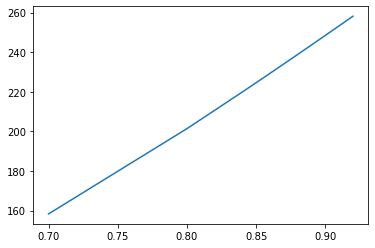

In [87]:
ratio_list=[.70,.80,.84,.85,.86,.87,.88,.90,.92]
list=[]
for ratio in ratio_list:
    PredFinal=FinalPrediction(ratio,NewDFHybrid)
    list.append(np.sqrt(mean_squared_error(Y_test_data,PredFinal)))
plt.plot(ratio_list,list)
plt.show()

In [97]:
PredFinal=FinalPrediction(0.60,NewDFHybrid)
print(np.sqrt(mean_squared_error(Y_test_data,PredFinal)))

123.5998435416298


In [98]:
print(mean_absolute_error(Y_test_data,PredFinal))

100.0108230859953


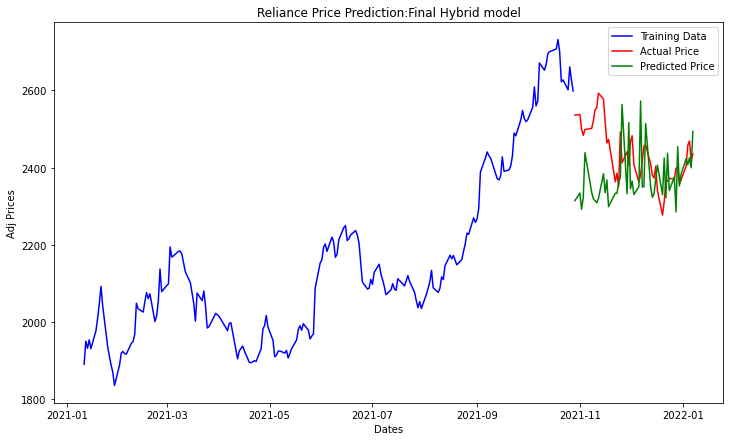

In [99]:
#Plotting the final Hybrid Model
plt.figure(figsize=(12,7))
plt.plot(y_train, 'green', color='blue', label='Training Data')
plt.plot(y_test.index[:],Y_test_data, color='red', label='Actual Price')
plt.plot(y_test.index[:], PredFinal, color='green', label='Predicted Price')
plt.title('Reliance Price Prediction:Final Hybrid model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [103]:
# load saved model
with open('model_arima_pkl' , 'rb') as f:
    m_ar = pickle.load(f)

In [105]:
m_ar.predict(1)

array([2598.69862374])

In [106]:
# load saved model
with open('rfc_pkl' , 'rb') as f:
    rfc_mod = pickle.load(f)

In [107]:
rfc_mod.predict([[0.056000,0.101000]])

array([2015.90345144])

In [108]:
actual=0.60*rfc_mod.predict([[0.056000,0.101000]])+(1-0.60)*m_ar.predict(1)
actual

array([2249.02152036])